# How to use widget in Jupyter Notebook 

## What are widgets ?

In computer software, widgets are the elements of the Graphical User Interfaces (GUIs). For exmaple, a slider to choice the value of the number or simply a textbox to show the information.

## Widgets in the Jupyter Notebook

The widgets libary can be imported into Jupyter notebook as: <br>
```python
import ipywidgets as widgets
```
<font color='red'>ipywidgets</font> is the Python library. 


In [224]:
import ipywidgets as widgets

## Create a slider with integer number

The initial value was set to zero. The range of this integer slider is from -10 to 10.

In [225]:
widgets.IntSlider(value=0, min=-10, max=10)

IntSlider(value=0, max=10, min=-10)

## The widgets can be exported as a variable and display by the <font color='red'>display</font> function. 


In [226]:
w = widgets.IntSlider(value=0, min=-10, max=10)
display(w)

IntSlider(value=0, max=10, min=-10)

## close the widget by:

In [227]:
w.close()

## Link different widgets

The values of different widgets can be linked by the link or jslink function. For exmaple, we can show the value
of the slider into a texbox. 

In [228]:
a = widgets.FloatSlider()
b = widgets.FloatText()
display(a, b)

mylink = widgets.link((a,'value'), (b,'value'))

FloatSlider(value=0.0)

FloatText(value=0.0)

unlink the widgets by <font color='red'>.unlink</font>

In [229]:
mylink.unlink()
display(a,b)

FloatSlider(value=0.0)

FloatText(value=0.0)

## Widgets list

There are many widgets offered by the ipywidgets library, which has different GUIs and functions.
For instance, numeric widgets, boolean widgets, selection widgets and string widgets. Here, I will
briefly introduce these widgets. 


## Numeric widgets

The numeric widgets are desgined to display numeric values. 

### A slider to show range in float numbers

In [230]:
widgets.FloatRangeSlider(
    value=[2, 7],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(2.0, 7.0), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

### A progress bar to display from zero to 100%

In [231]:
import time 


w = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
)

display(w)
x = 0

while x <= 100:
    w.value += 1
    time.sleep(0.1)
    x +=1


IntProgress(value=0, bar_style='success', description='Loading:')

## Boolean widgets

Boolean widgets are designed to show boolean values. 

### ToggleButton

In [232]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='danger', 
    tooltip='Description',
    icon='check'
)


ToggleButton(value=False, button_style='danger', description='Click me', icon='check', tooltip='Description')

## Selection widgets 

Selection widgets can be used to select single or multiple values. 

### Multiple values can be selected by the shift key

In [233]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

## String widgets

String widgets are used to display string values. 

### Textarea to show some text

In [234]:
widgets.Textarea(
    value='Hello the world!',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello the world!', description='String:', placeholder='Type something')

## Other widgets 

There are many other widgets. For instance, color picker widget, file upload widget and etc. 
One can find all the information at:

[Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html)

## Layout of widgets

In many cases, one need to arrange several widgets together for the tasks. The ipywidgets library 
also provides functions to order the layout of the widgets. 

### Arrange four buttons into a 2x2 grid

In [235]:
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
from ipywidgets import TwoByTwoLayout

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

top_left_button = create_expanded_button("Top left", 'info')
top_right_button = create_expanded_button("Top right", 'success')
bottom_left_button = create_expanded_button("Bottom left", 'danger')
bottom_right_button = create_expanded_button("Bottom right", 'warning')

TwoByTwoLayout(top_left=top_left_button,
               top_right=top_right_button,
               bottom_left=bottom_left_button,
               bottom_right=bottom_right_button)

TwoByTwoLayout(children=(Button(button_style='info', description='Top left', layout=Layout(grid_area='top-left…

### Create a application-like widget by the AppLayout function

In [236]:
from ipywidgets import AppLayout, Button, Layout

header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

AppLayout(header=header_button,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button)

AppLayout(children=(Button(button_style='success', description='Header', layout=Layout(grid_area='header', hei…

## Building a custom widget 

In [304]:
from traitlets import Unicode, Bool, validate, TraitError
from ipywidgets import DOMWidget, register


@register
class Email(DOMWidget):
    _view_name = Unicode('EmailView').tag(sync=True)
    _view_module = Unicode('email_widget').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)

In [305]:
%%javascript
require.undef('email_widget');

define('email_widget', ["@jupyter-widgets/base"], function(widgets) {

    var EmailView = widgets.DOMWidgetView.extend({

        // Render the view.
        render: function() {
            this.canvas = document.createElement('CANVAS');
            this.canvas.height = 150;
            this.canvas.width = 150;
            this.canvas.style = "border:10px solid #FF0000";
            this.el.append(this.canvas);
        },
    });

    return {
        EmailView: EmailView
    };
});

<IPython.core.display.Javascript object>

In [306]:
Email()

Email()

In [279]:
import ipywidgets
from traitlets import Int, Unicode, Tuple, CInt, Dict, validate

class CircleWidget(ipywidgets.DOMWidget):
    _view_name = Unicode('CircleView').tag(sync=True)
    _view_module = Unicode('circle').tag(sync=True)
    radius = Int(100).tag(sync=True)
    circles = Tuple().tag(sync=True)
    width = Int().tag(sync=True)
    height = Int().tag(sync=True)
    radius = Int().tag(sync=True)
    def __init__(self, **kwargs):
        super(ipywidgets.DOMWidget, self).__init__(**kwargs)
        self.width = kwargs.get('width', 500)
        self.height = kwargs.get('height', 100)
        self.radius = 1
    def drawCircle(self, x, y, fillColor="white", borderColor="black"):
        newCircle = {"x": x,  "y": y, "radius": self.radius * 10, "fillColor": fillColor, "borderColor": borderColor}
        self.circles = self.circles + (newCircle,)

In [264]:
%%javascript
"use strict";

require.undef('circle');

define('circle', ["@jupyter-widgets/base", "d3"], function(widgets, d3) {

    var CircleView = widgets.DOMWidgetView.extend({

        initialize: function() {
            console.log("---- initialize, this:");
            console.log(this);
            this.circles = [];
            this.radius = 1;
            },

        createDiv: function(){
            var width = this.model.get('width');
            var height = this.model.get('height');
            var divstyle = $("<div id='d3DemoDiv' style='border:1px solid red; height: " +
                             height + "px; width: " + width + "px'>");
            return(divstyle);
            },

        createCanvas: function(){
            var width = this.model.get('width');
            var height = this.model.get('height');
            var radius = this.model.get('radius');
            console.log("--SIZE--", width, 'x', height, " radius", radius);
            var svg = d3.select("#d3DemoDiv")
                        .append("svg")
                        .attr("id", "svg").attr("width", width).attr("height", height);

            this.svg = svg;
            var circleView = this;

            svg.on('click', function() {
                var coords = d3.mouse(this);
                //debugger;
                var radius = circleView.radius;
                console.log('--MOUSE--', coords, " radius:", radius);
                var newCircle = {x: coords[0], y: coords[1], radius: 10 * radius,
                                 borderColor: "black", fillColor: "beige"};
                circleView.circles.push(newCircle);
                circleView.drawCircle(newCircle);
                //debugger;
                circleView.model.set("circles", JSON.stringify(circleView.circles));
                circleView.touch();
                });
           },

        drawCircle: function(obj){
           this.svg.append("circle")
              .style("stroke", "gray")
              .style("fill", "white")
              .attr("r", obj.radius)
              .attr("cx", obj.x)
              .attr("cy", obj.y)
              .on("mouseover", function(){d3.select(this).style("fill", "aliceblue");})
              .on("mouseout",  function(){d3.select(this).style("fill", "white");});
            },

        render: function() {
            this.$el.append(this.createDiv());
            this.listenTo(this.model, 'change:circles', this._circles_changed, this);
            this.listenTo(this.model, 'change:radius', this._radius_changed, this);
            var circleView = this;
            function myFunc(){
               circleView.createCanvas()
               };
            setTimeout(myFunc, 500);
            },

        _circles_changed: function() {
           var circles = this.model.get("circles");
           var newCircle = circles[circles.length-1];
           console.log('--DRAW--', this.circles);
           this.circles.push(newCircle);
           console.log('--LENGTH--', circles.length, " == ", circles.length);
           this.drawCircle(newCircle);
           },

        _radius_changed: function() {
           console.log('--RADIUS--', this.radius, this.model.get('radius'));
           this.radius = this.model.get('radius');
           }
    });
    return {
        CircleView : CircleView
    };
});

<IPython.core.display.Javascript object>

In [269]:
cw = CircleWidget(width=500, height=100)
cw.drawCircle(x=100, y=100)
display(cw)

CircleWidget(circles=({'x': 100, 'y': 100, 'radius': 10, 'fillColor': 'white', 'borderColor': 'black'},), heig…

## A example to show the application of the widgets

## Here is a interactive figure for sine function

<IPython.core.display.Javascript object>


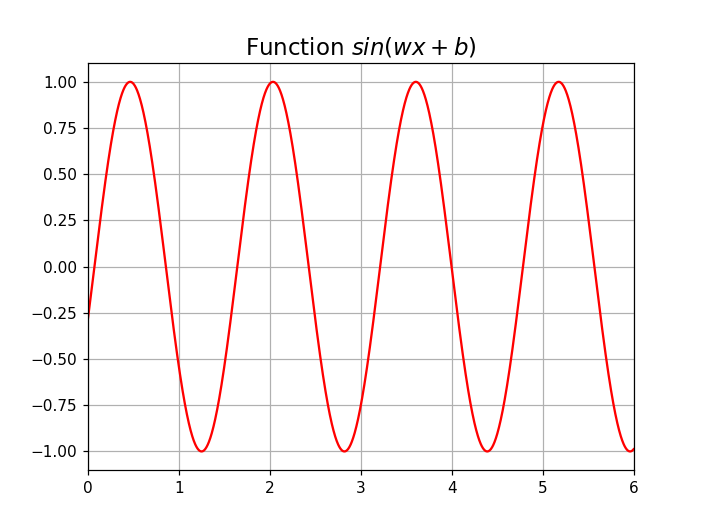

interactive(children=(IntSlider(value=10, description='w', max=10, min=-10), IntSlider(value=0, description='b…

In [56]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider

x = np.linspace(0, 2 * np.pi, 2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x),'r-')
ax.grid(True)
plt.xlim(0,6)
plt.title(r"Function $sin(wx+b)$", fontsize=15)

def update(w=IntSlider(value=10, min=-10, max=10), b=IntSlider(value=0.0, min=-10, max=10)):
    line.set_ydata(np.sin(w * x + b))
    fig.canvas.draw_idle()

widgets.interact(update);